Associated business report: https://docs.google.com/document/d/12bBWEzSgOUYGG_mbW2Zr4n_VnNZtB4XKoDagVQymeU0/edit?usp=sharing

# IMPORT LIBRARIES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READ THE DATAFRAME

In [54]:
df = pd.read_csv("/content/drive/MyDrive/State_wise_Health_income.csv")

In [55]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# BASIC METHODS AND INFORMATION ON THE DATAFRAME

In [56]:
df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22


In [57]:
df.tail()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
292,Greencastle,3443,970,2499,238636
293,Greenisland,2963,793,1257,162831
294,Greyabbey,3276,609,1522,120184
295,Greysteel,3463,847,934,199403
296,Groggan,2070,838,3179,166767


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States             297 non-null    object
 1   Health_indeces1    297 non-null    int64 
 2   Health_indices2    297 non-null    int64 
 3   Per_capita_income  297 non-null    int64 
 4   GDP                297 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 11.7+ KB


In [59]:
df.shape

(297, 5)

In [61]:
df.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.000000,297.000000,297.000000,297.000000
mean,2630.151515,693.632997,2156.915825,174601.117845
std,2038.505431,468.944354,1491.854058,167167.992863
min,-10.000000,0.000000,500.000000,22.000000
25%,641.000000,175.000000,751.000000,8721.000000
50%,2451.000000,810.000000,1865.000000,137173.000000
75%,4094.000000,1073.000000,3137.000000,313092.000000
max,10219.000000,1508.000000,7049.000000,728575.000000


In [62]:
df.isnull().sum()

States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [63]:
df.columns

Index(['States', 'Health_indeces1', 'Health_indices2', 'Per_capita_income',
       'GDP'],
      dtype='object')

In [64]:
df.sort_values(by=['GDP'], ascending=False).head(15)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
89,Ballygalley,6862,1031,2246,728575
170,Clabby,6818,1031,2233,713295
234,Dorsey,6723,1046,2282,703190
193,Corrinshego,6569,1026,2232,670049
222,Derryvore,6494,1045,2437,658635
219,Derrynaflaw,6430,1085,2369,652154
225,Doagh,9403,1390,5888,509695
63,Strumyani,5329,1222,2700,475471
160,Carrowclare,5253,1230,2565,467229
214,Derryhale,5133,1242,3223,463120


# EXPLORATORY DATA ANALYSIS

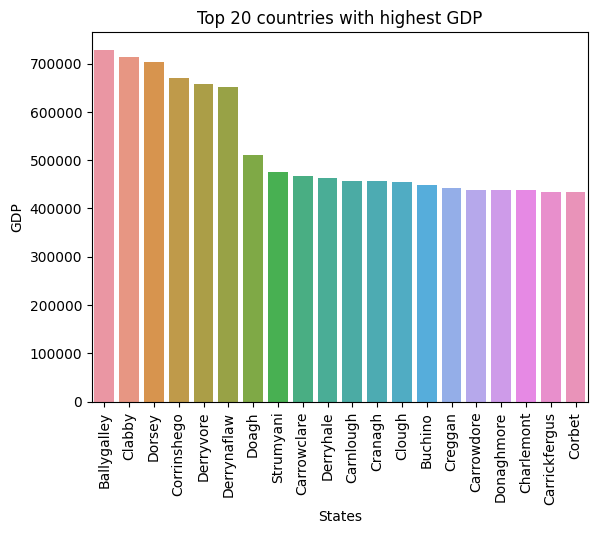

In [65]:
sns.barplot(x='States', y='GDP', data=df.sort_values(by=['GDP'], ascending=False).head(20));
plt.xticks(rotation=90)
plt.title("Top 20 states with highest GDP");

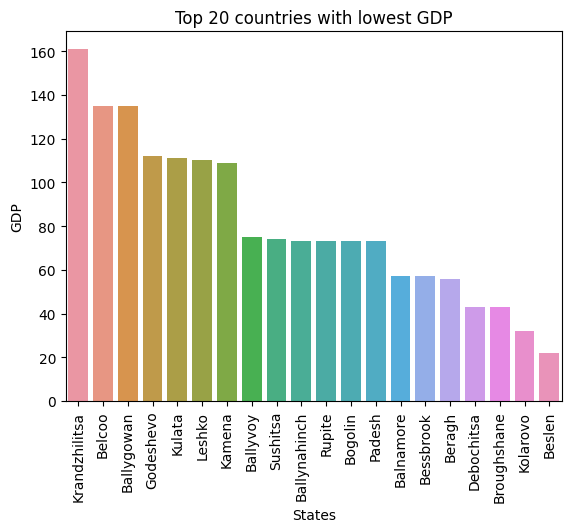

In [66]:
sns.barplot(x='States', y='GDP', data=df.sort_values(by=['GDP'], ascending=False).tail(20));
plt.xticks(rotation=90)
plt.title("Top 20 states with lowest GDP");

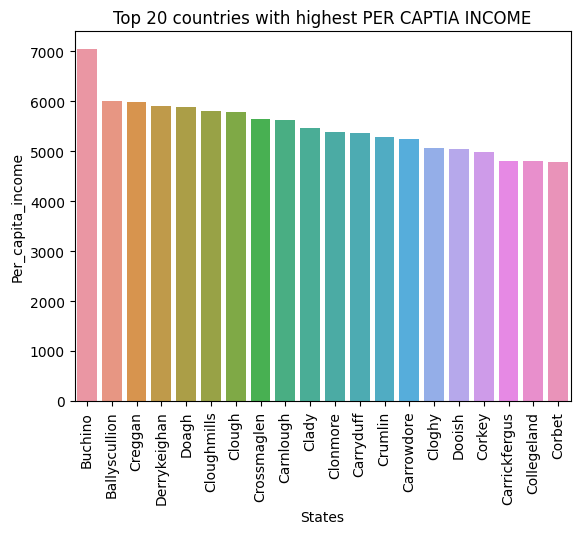

In [67]:
sns.barplot(x='States', y='Per_capita_income', data=df.sort_values(by=['Per_capita_income'], ascending=False).head(20));
plt.xticks(rotation=90)
plt.title("Top 20 states with highest PER CAPITA INCOME");

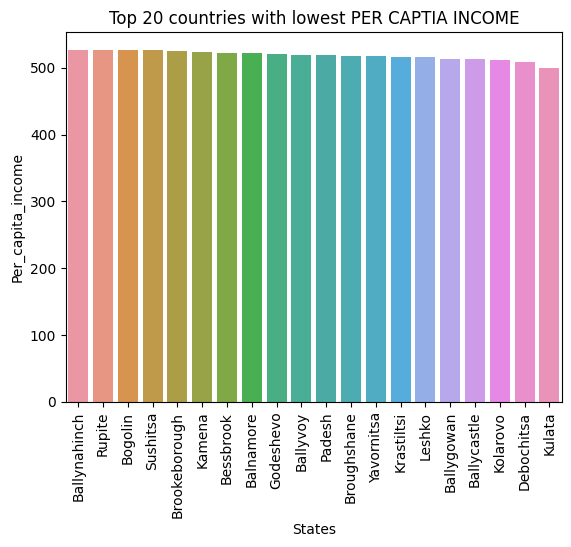

In [68]:

sns.barplot(x='States', y='Per_capita_income', data=df.sort_values(by=['Per_capita_income'], ascending=False).tail(20));
plt.xticks(rotation=90)
plt.title("Top 20 states with lowest PER CAPITA INCOME");

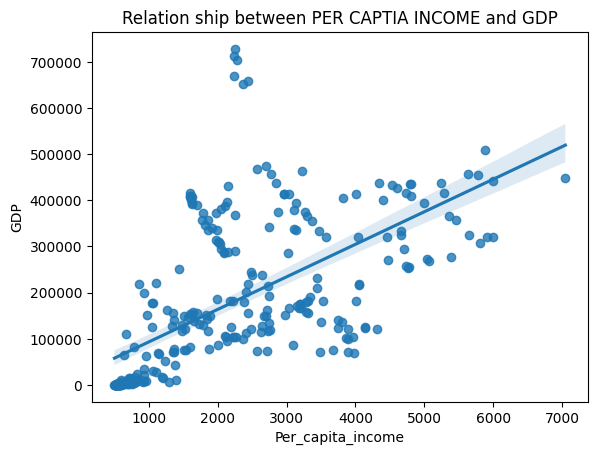

In [69]:
sns.regplot(x='Per_capita_income', y='GDP', data=df)
plt.title("Relation ship between PER CAPITA INCOME and GDP");

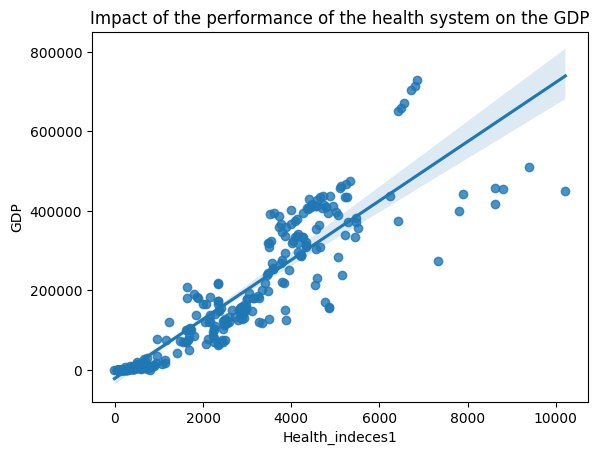

In [70]:
sns.regplot(x='Health_indeces1', y='GDP', data=df)
plt.title("Impact of the performance of the health system on the GDP");

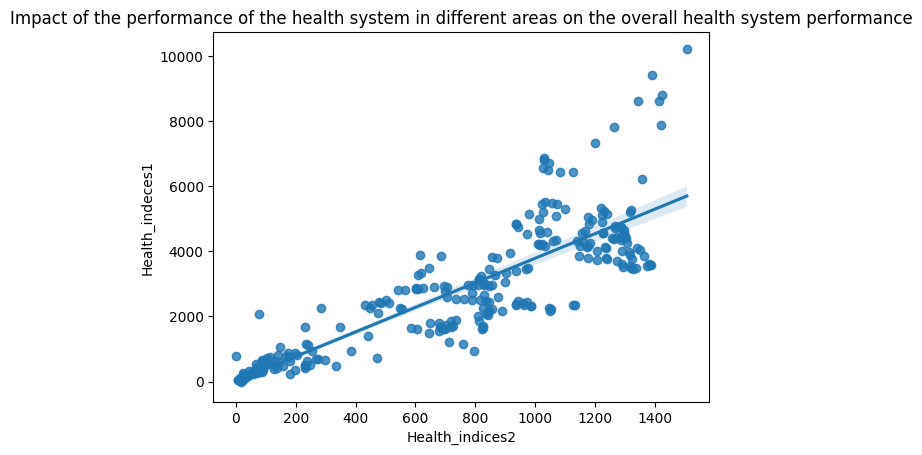

In [71]:
sns.regplot(x='Health_indices2', y='Health_indeces1', data=df)
plt.title("Impact of the performance of the health system in different areas on the overall health system performance");

# CHECKING THE COLUMNS WITH OUTLIERS

In [72]:
# List of columns to check for outliers
columns_to_check =['Health_indeces1', 'Health_indices2',
       'Per_capita_income', 'GDP']

# Set the IQR threshold
iqr_threshold = 1.5

# List to store names of columns with outliers
columns_with_outliers = []

# Loop through each column to check for outliers using IQR method
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
        columns_with_outliers.append(column)

print("Columns with outliers are:")
print(columns_with_outliers)


Columns with outliers are:
['Health_indeces1', 'Per_capita_income']


# Z-SCALING ON THE DATAFRAME, AND THEN PLOTTING THE OUTLIERS COLUMNS BEFORE AND AFTER SCALING

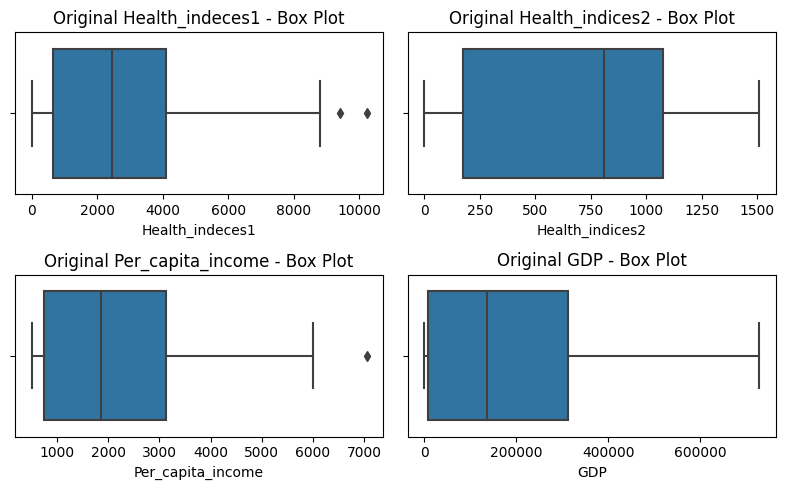

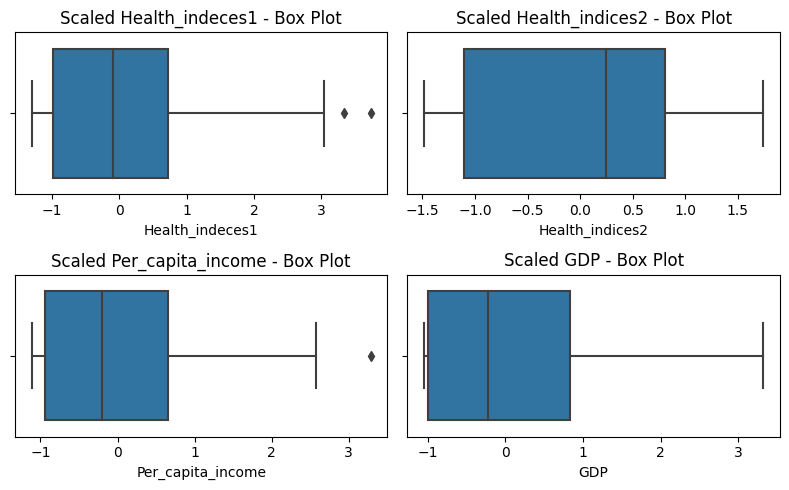

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

# Select columns to scale
columns_to_scale = ['Health_indeces1', 'Health_indices2', 'Per_capita_income', 'GDP']
# Set up larger figure size
plt.figure(figsize=(8, 5))

# Create subplots with side-by-side comparison
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(len(columns_to_scale)//2, 2, i)

    # Original data box plot
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title(f'Original {column} - Box Plot')

    # Add margin around each plot
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Adjust layout
plt.tight_layout()

# Scaling using z-score method
scaled_data = df[columns_to_scale].apply(zscore)
scaled_data['States'] = df['States']
# Set up larger figure size for scaled plots
plt.figure(figsize=(8, 5))

# Create subplots with side-by-side comparison for scaled data
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(len(columns_to_scale)//2, 2, i)

    # Scaled data box plot
    sns.boxplot(x=scaled_data[column])
    plt.xlabel(column)
    plt.title(f'Scaled {column} - Box Plot')

    # Add margin around each plot
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

## Why scaling is necessary for k-means clustering?**

**K-means clustering aims to partition data points into clusters by minimizing the sum of squared distances between each data point and the centroid of its assigned cluster. Outliers, being data points that are significantly different from the rest of the data, can heavily influence the centroid calculation and the resulting cluster assignments.**

# CHECKING SPEED OF K-MEANS ON `df` <i>(unscaled dataframe)</i> AND `scaled_data` <i>(scaled dataframe)</i>

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time

# Select the columns for clustering
columns_to_cluster = ['Health_indeces1', 'Health_indices2', 'Per_capita_income', 'GDP']

# Extract the data from the DataFrame
data = df[columns_to_cluster]

# Create a StandardScaler instance to scale the data
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(data)

# Set the number of clusters (k)
num_clusters = 3

# Initialize KMeans instances
kmeans_unscaled = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans_scaled = KMeans(n_clusters=num_clusters, n_init='auto')

# Measure time for unscaled K-means
start_time = time.time()
kmeans_unscaled.fit(data)
unscaled_time = time.time() - start_time

# Measure time for scaled K-means
start_time = time.time()
kmeans_scaled.fit(scaled_data)
scaled_time = time.time() - start_time

print("Time for unscaled K-means:", unscaled_time, "seconds")
print("Time for scaled K-means:", scaled_time, "seconds")


Time for unscaled K-means: 0.17616868019104004 seconds
Time for scaled K-means: 0.16692638397216797 seconds


# Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

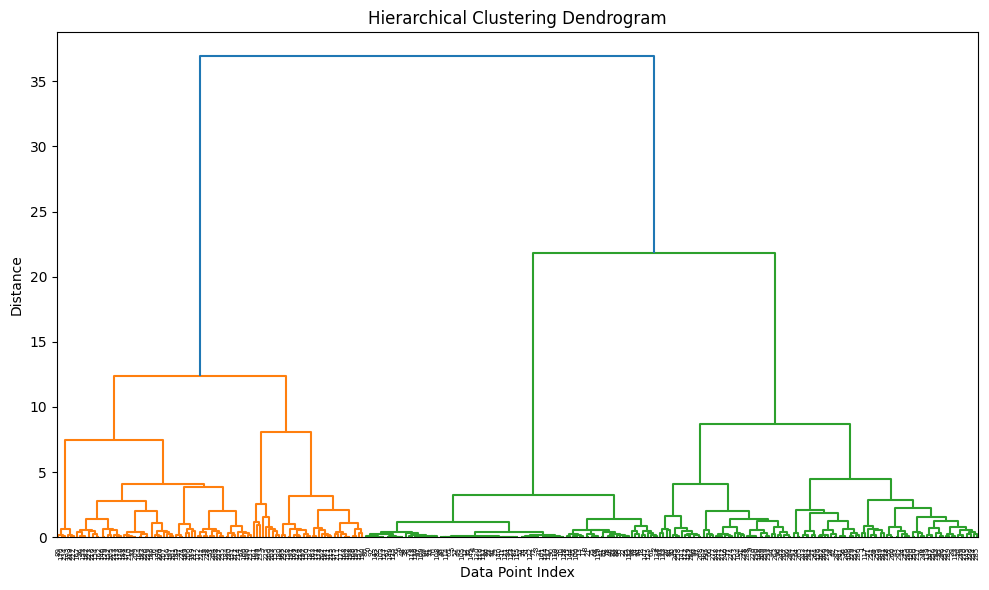

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Extract the data from the DataFrame
data = df[columns_to_cluster]

# Create a StandardScaler instance to scale the data
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(data)

# Calculate linkage matrix using Ward linkage and Euclidean distance
linkage_matrix = linkage(scaled_data, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(df)), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


# Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

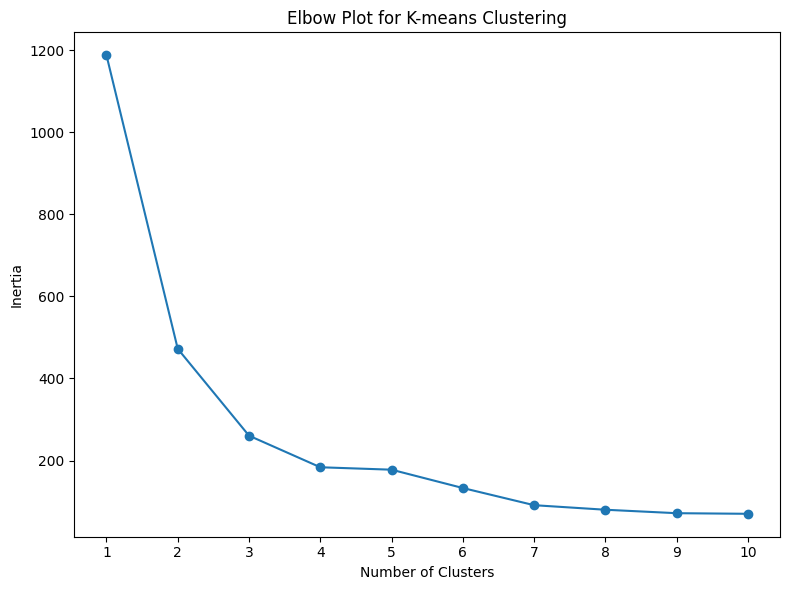

In [76]:
inertia_values = []

# Range of number of clusters to try (up to n=10)
num_clusters_range = range(1, 11)

# Calculate inertia for each number of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(num_clusters_range)
plt.tight_layout()
plt.show()

**8 is the optimum number of clusters as over here, the graph flattens out.**

# Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

Number of clusters: 2, Silhouette Score: 0.5052
Number of clusters: 3, Silhouette Score: 0.5335
Number of clusters: 4, Silhouette Score: 0.5521
Number of clusters: 5, Silhouette Score: 0.5569
Number of clusters: 6, Silhouette Score: 0.5315
Number of clusters: 7, Silhouette Score: 0.5549
Number of clusters: 8, Silhouette Score: 0.5261
Number of clusters: 9, Silhouette Score: 0.5299
Number of clusters: 10, Silhouette Score: 0.4899


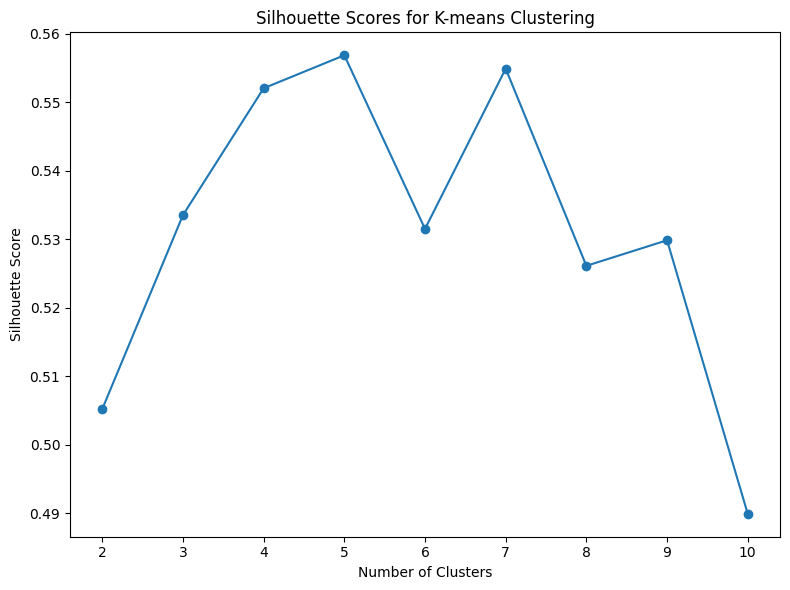

In [77]:
silhouette_scores = []

# Range of number of clusters to try (up to n=10)
num_clusters_range = range(2, 11)

# Calculate silhouette score for each number of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.tight_layout()
plt.show()